In [ ]:
import os 
if os.path.basename(os.getcwd()) == "notebooks": os.chdir("..")
import datajoint as dj
from datetime import datetime
from pathlib import Path
import re
import numpy as np
import intanrhdreader
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from workflow.pipeline import lineage, culture
from workflow.pipeline import probe, ephys, analysis, ingestion
from workflow.utils.paths import (get_ephys_root_data_dir, get_raw_root_data_dir, get_repo_dir, get_organoid_directory)

[2023-10-23 17:08:43,916][INFO]: Connecting utah-worker@db.datajoint.com:3306
[2023-10-23 17:08:44,291][INFO]: Connected utah-worker@db.datajoint.com:3306


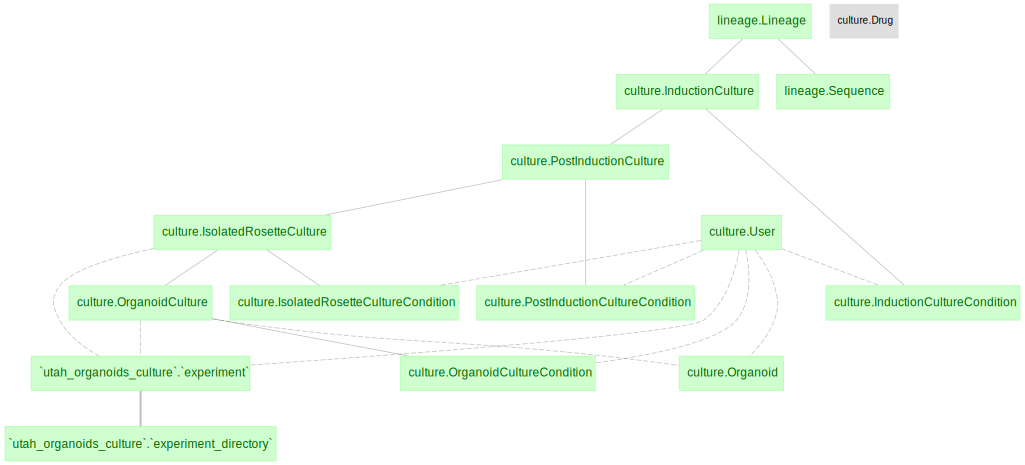

In [ ]:
dj.Diagram(lineage) + dj.Diagram(culture)

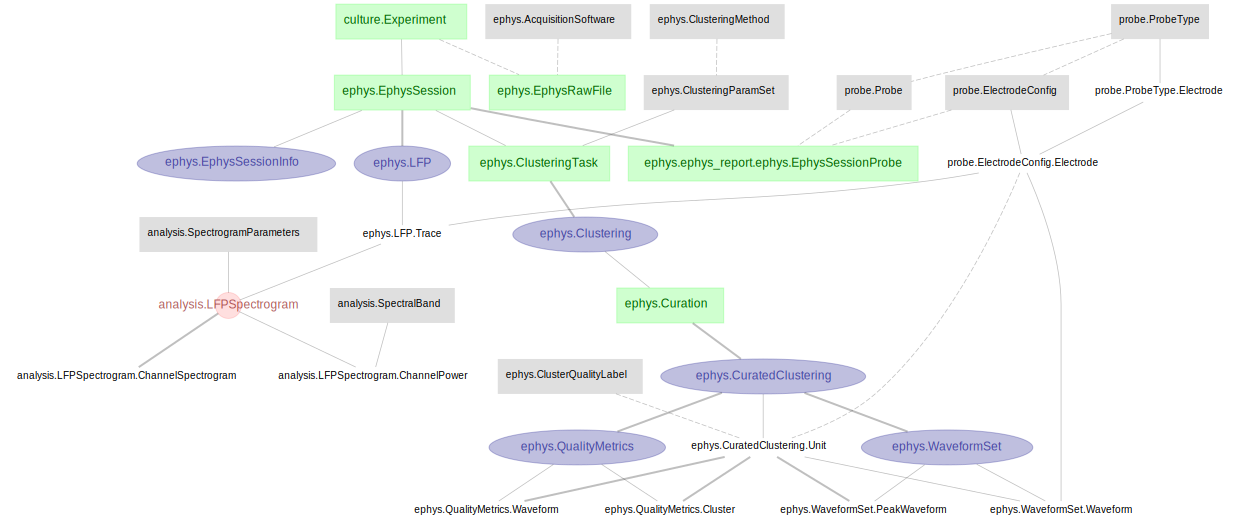

In [ ]:
dj.Diagram(culture.Organoid) + dj.Diagram(probe) + dj.Diagram(ephys) + dj.Diagram(analysis)

### Insert into the table upstream from the ephys schema (e.g,. `culture.OrganoidCulture` and `culture.Organoid`)

In [ ]:
ingestion.ingest_orgnoid()
display(culture.OrganoidCulture())
display(culture.Organoid())

"organoid_culture_id e.g., O09-12",user,organoid_culture_date,organoid_culture_plate,isolated_rosette_culture_wells Wells from the 96-well plate used to embed organoids
O09-12,None,None,None,None
O13-16,None,None,None,None
O17-20,None,None,None,None


organoid_id e.g. O17,"organoid_culture_id e.g., O09-12","experiment_type e.g. mrna lysate, oct, protein lysate, or matrigel embedding, ephys, tracing",experiment_directory data directory for long term recordings relative to the root directory.
O09,O09-12,ephys,O09-12_raw
O10,O09-12,ephys,O09-12_raw
O11,O09-12,ephys,O09-12_raw
O12,O09-12,ephys,O09-12_raw
O13,O13-16,ephys,O13-16_raw
O14,O13-16,ephys,O13-16_raw
O15,O13-16,ephys,O13-16_raw
O16,O13-16,ephys,O13-16_raw
O17,O17-20,ephys,O17-20_raw
O18,O17-20,ephys,O17-20_raw


### Insert into `probe.ProbeType`, `probe.Probe`, and `probe.ElectrodeConfig`

In [ ]:
ingestion.ingest_probe()
display(probe.ProbeType())
display(probe.ProbeType.Electrode())
display(probe.ElectrodeConfig())
display(probe.ElectrodeConfig.Electrode())
display(probe.Probe())

probe_type e.g. neuropixels_1.0,"probe_full_name full, non-abbreviated name of the probe"
A1x32-5mm-25-177,None


probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0","shank shank index, starts at 0, advance left to right","shank_col column index, starts at 0, advance left to right","shank_row row index, starts at 0.",x_coord (um) x coordinate of the electrode within the probe.,y_coord (um) y coordinate of the electrode within the probe.
A1x32-5mm-25-177,0,0,0,0,0.0,0.0
A1x32-5mm-25-177,1,0,0,1,0.0,25.0
A1x32-5mm-25-177,2,0,0,2,0.0,50.0
A1x32-5mm-25-177,3,0,0,3,0.0,75.0
A1x32-5mm-25-177,4,0,0,4,0.0,100.0
A1x32-5mm-25-177,5,0,0,5,0.0,125.0
A1x32-5mm-25-177,6,0,0,6,0.0,150.0
A1x32-5mm-25-177,7,0,0,7,0.0,175.0
A1x32-5mm-25-177,8,0,0,8,0.0,200.0
A1x32-5mm-25-177,9,0,0,9,0.0,225.0


electrode_config_hash,probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name
e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,0-31


electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0","channel channel name fetched from raw data (e.g., A-001)"


probe unique identifier for this model of probe (e.g. serial number),probe_type e.g. neuropixels_1.0,probe_comment
12D4D,A1x32-5mm-25-177,
12D51,A1x32-5mm-25-177,
12D76,A1x32-5mm-25-177,
12D77,A1x32-5mm-25-177,
Q983,A1x32-5mm-25-177,
T590,A1x32-5mm-25-177,
T591,A1x32-5mm-25-177,
T593,A1x32-5mm-25-177,
T595,A1x32-5mm-25-177,


### Insert into `ephys.EphysRawFile`

Sample dataset directory structure including multiple subjects, a continuous recording session, and a single probe for each subject
  ```text
    O17-20_raw
    ├── *O17-20_230630_024921.rhd
    ├── *O17-20_230630_025021.rhd
    ├── *O17-20_230630_025121.rhd
    └── *O17-20_230630_025221.rhd
  ```

In [ ]:
ingestion.ingest_ephys_files()
ephys.EphysRawFile()

[2023-10-23 17:09:00,385][INFO]: 8 files have been inserted into ephys.EphysRawFile table


file_path path to the file on the external store relative to the root directory,"organoid_culture_id e.g., O09-12",acq_software,file_time date and time of the file acquisition,parent_folder parent folder containing the file,"filename_prefix filename prefix, if any, excluding the datetime information",file
O17-20_raw/O17-20_230630_024921.rhd,O17-20,Intan,2023-06-30 02:49:21,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230630_025021.rhd,O17-20,Intan,2023-06-30 02:50:21,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230630_025121.rhd,O17-20,Intan,2023-06-30 02:51:21,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230630_025221.rhd,O17-20,Intan,2023-06-30 02:52:21,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230713_183014.rhd,O17-20,Intan,2023-07-13 18:30:14,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230713_183114.rhd,O17-20,Intan,2023-07-13 18:31:14,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230713_183214.rhd,O17-20,Intan,2023-07-13 18:32:14,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230713_183314.rhd,O17-20,Intan,2023-07-13 18:33:14,O17-20_raw,O17-20,=BLOB=


### Insert into `ephys.EphysSession`

In [ ]:
ingestion.ingest_ephys_session()
display(ephys.EphysSession())

"organoid_culture_id e.g., O09-12",start_time,end_time,session_type analysis method,drug_name,drug_concentration concentration in uM
O09-12,2023-05-18 12:25:00,2023-05-18 18:15:00,both,4-AP,100.0
O09-12,2023-05-18 18:15:00,2023-05-19 09:30:00,both,No Drug,nan
O09-12,2023-05-19 09:30:00,2023-05-19 15:35:00,both,Bicuculline,50.0
O09-12,2023-05-19 15:45:00,2023-05-20 15:40:00,both,Tetrodotoxin,1.0
O13-16,2023-06-08 19:05:00,2023-06-08 23:35:00,both,4-AP,100.0
O13-16,2023-06-08 23:35:00,2023-06-09 10:20:00,both,No Drug,nan
O13-16,2023-06-09 10:20:00,2023-06-09 15:35:00,both,Bicuculline,50.0
O13-16,2023-06-09 15:40:00,2023-06-10 14:15:00,both,Tetrodotoxin,1.0
O17-20,2023-07-12 13:10:00,2023-07-12 16:10:00,both,4-AP,100.0
O17-20,2023-07-12 16:10:00,2023-07-13 12:35:00,both,No Drug,100.0


### Insert into `ephys.EphysSessionInfo`

In [ ]:
ephys.EphysSessionInfo.populate()

[2023-10-23 17:09:17,278][INFO]: Populating ephys.EphysSessionInfo for <{'organoid_culture_id': 'O17-20', 'start_time': datetime.datetime(2023, 7, 13, 18, 15), 'end_time': datetime.datetime(2023, 7, 14, 15, 45)}>


{'success_count': 12, 'error_list': []}

In [ ]:
key = (culture.OrganoidCulture & "organoid_culture_id='O17-20'").fetch1("KEY")
key

{'organoid_culture_id': 'O17-20'}

In [ ]:
from pprint import pprint

display(ephys.EphysSessionInfo())

session_info = (ephys.EphysSessionInfo & key).fetch1("session_info")
pprint(session_info) # session header extracted from the first file in a session

"organoid_culture_id e.g., O09-12",start_time,end_time,session_info Session header info from intan .rhd file. Get this from the first session file.
O17-20,2023-07-13 18:15:00,2023-07-14 15:45:00,=BLOB=


{'amplifier_channels': [{'board_stream': 0,
                         'chip_channel': 0,
                         'custom_channel_name': 'A-000',
                         'custom_order': 0,
                         'electrode_impedance_magnitude': 41204.3515625,
                         'electrode_impedance_phase': -20.303863525390625,
                         'native_channel_name': 'A-000',
                         'native_order': 0,
                         'port_name': 'Port A',
                         'port_number': 1,
                         'port_prefix': 'A'},
                        {'board_stream': 0,
                         'chip_channel': 1,
                         'custom_channel_name': 'A-001',
                         'custom_order': 1,
                         'electrode_impedance_magnitude': 40965.7578125,
                         'electrode_impedance_phase': -20.08125114440918,
                         'native_channel_name': 'A-001',
                         'native

### Plot data


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import signal

TARGET_SAMPLING_RATE = 2500

session_key = (ephys.EphysSession - "session_type='spike_sorting'" & organoid_key).fetch1("KEY")

# Load the data
files = (
    ephys.RawData
    & f"start_time BETWEEN '{session_key['start_time']}' AND '{session_key['end_time']}'"
).fetch("file_path", order_by="start_time")
file = files[0]  # plot the first file
data = intanrhdreader.load_file(file)

header = data.pop("header")
lfp_sampling_rate = header["sample_rate"]
powerline_noise_freq = header["notch_filter_frequency"]  # in Hz
downsample_factor = int(lfp_sampling_rate / TARGET_SAMPLING_RATE)

channels = [
    ch["native_channel_name"] for ch in data["amplifier_channels"]
]  # channels with raw ephys traces
lfp_traces = data["amplifier_data"]
lfp_data = {ch: lfp for ch, lfp in  zip(channels, lfp_traces)}

In [ ]:
# plot all channels
fig, ax = plt.subplots(figsize=(20, 10))
ytick_loc = []
for i, (ch, lfp) in enumerate(lfp_data.items()): 
    ytick_loc.append(i * 500)
    ax.plot(data["t"], lfp + ytick_loc[-1], linewidth=0.1)
ax.set_yticks(ytick_loc)
ax.set_yticklabels(lfp_data.keys())
ax.tick_params(length=0)
ax.set(xlabel="Time (s)", title=Path(file).name)
sns.despine(right = True, left = True)
plt.show()

In [ ]:
# Plot raw vs. downsampled data
channel = "D-002"
nb_data_points = 20000   
fig, ax = plt.subplots(figsize=(20, 4))

timestamps, lfp = data["t"][:nb_data_points], lfp_data[channel][:nb_data_points]
timestamps_downsampled, lfp_downsampled = timestamps[::downsample_factor], lfp[::downsample_factor]

ax.plot(timestamps, lfp, 'k', linewidth=0.6, alpha=0.7, label="raw")
ax.plot(timestamps_downsampled, lfp_downsampled, 'm', linewidth=1, label="downsampled")
ax.set(xlabel="Time (s)", ylabel="Amplitude (μV)", title=f"{Path(file).stem}.rhs - {channel}")
sns.despine()
plt.legend(loc='center left', bbox_to_anchor=(0.98, 0.5)) 
plt.show()

In [ ]:
# Raw data vs. denoised vs. lowpass-filtered
b_notch, a_notch = signal.iirnotch(
    w0=powerline_noise_freq, Q=30, fs=TARGET_SAMPLING_RATE
)
lfp_denoised = signal.filtfilt(b_notch, a_notch, lfp_downsampled)

# Lowpass filter
b_butter, a_butter = signal.butter(
    N=4, Wn=1000, btype="lowpass", fs=TARGET_SAMPLING_RATE
)
lfp_lowpass = signal.filtfilt(b_butter, a_butter, lfp_denoised)

fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(timestamps_downsampled, lfp_downsampled, 'k', linewidth=1, alpha=0.7, label="downsampled")
ax.plot(timestamps_downsampled, lfp_denoised, 'g', linewidth=1, alpha=0.7, label="denoised")
ax.plot(timestamps_downsampled, lfp_lowpass, 'm', linewidth=1, alpha=0.7, label="lowpass")

ax.set(xlabel="Time (s)", ylabel="Amplitude (μV)", title=f"{Path(file).stem}.rhs - {channel}")
sns.despine()
plt.legend(loc='center left', bbox_to_anchor=(0.98, 0.5)) 
plt.show()